In [29]:
import os
"""
 * Python program to determine root mass, as a ratio of pixels in the
 * root system to the number of pixels in the entire image.
 *
 * usage: python RootMass.py <filename> <sigma>
"""
import sys
import numpy as np
import skimage.io
import skimage.filters

ROOT_DIR = os.path.abspath("../")

sys.path.append(os.path.join(ROOT_DIR, "Cells\\"))
IMAGE_DIR = os.path.join(ROOT_DIR, "Mask_RCNN\\Cells")
# get filename and sigma value from command line
filename = IMAGE_DIR + "\\--W00001--P00004--Z00000--T00000--eGFP.tif"
sigma = 1.5 #float(sys.argv[2])

# read the original image, converting to grayscale
img = skimage.io.imread(fname=filename, as_gray=True)

# blur before thresholding
blur = skimage.filters.gaussian(img, sigma=sigma)


# perform adaptive thresholding to produce a binary image
t = skimage.filters.threshold_otsu(blur)
binary = blur > t

# save binary image; first find beginning of file extension
dot = filename.index(".")
binary_file_name = filename[:dot] + "-binary" + filename[dot:]
skimage.io.imsave(fname=binary_file_name, arr=skimage.img_as_ubyte(binary))

# determine root mass ratio
rootPixels = np.nonzero(binary)
w = binary.shape[1]
h = binary.shape[0]
density = rootPixels / (w * h)

# output in format suitable for .csv
print(filename, density, sep=",")

OME series: not an ome-tiff master file


TypeError: unsupported operand type(s) for /: 'tuple' and 'int'

In [6]:
from PIL import Image, ImageEnhance
import numpy as np
from PIL import ImageFilter
import colorsys
import os
from skimage.filters import gabor, gaussian
from IPython.display import display
from matplotlib.pyplot import imshow
from pywt import dwt2
import pickle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

['.git', '.gitignore', '.idea', 'assets', 'Cells', 'images', 'LICENSE', 'MANIFEST.in', 'mask_rcnn_coco.h5', 'mrcnn', 'README.md', 'requirements.txt', 'samples', 'setup.cfg', 'setup.py', 'Thresholding.ipynb', 'venv']


['--W00001--P00004--Z00000--T00000--BFP.tif', '--W00001--P00004--Z00000--T00000--DsRed.tif', '--W00001--P00004--Z00000--T00000--eGFP-binary.tif', '--W00001--P00004--Z00000--T00000--eGFP.tif', '--W00001--P00004--Z00000--T00000--miRFP.tif', '--W00001--P00004--Z00000--T00000--Trans.tif']
(2048, 2048)


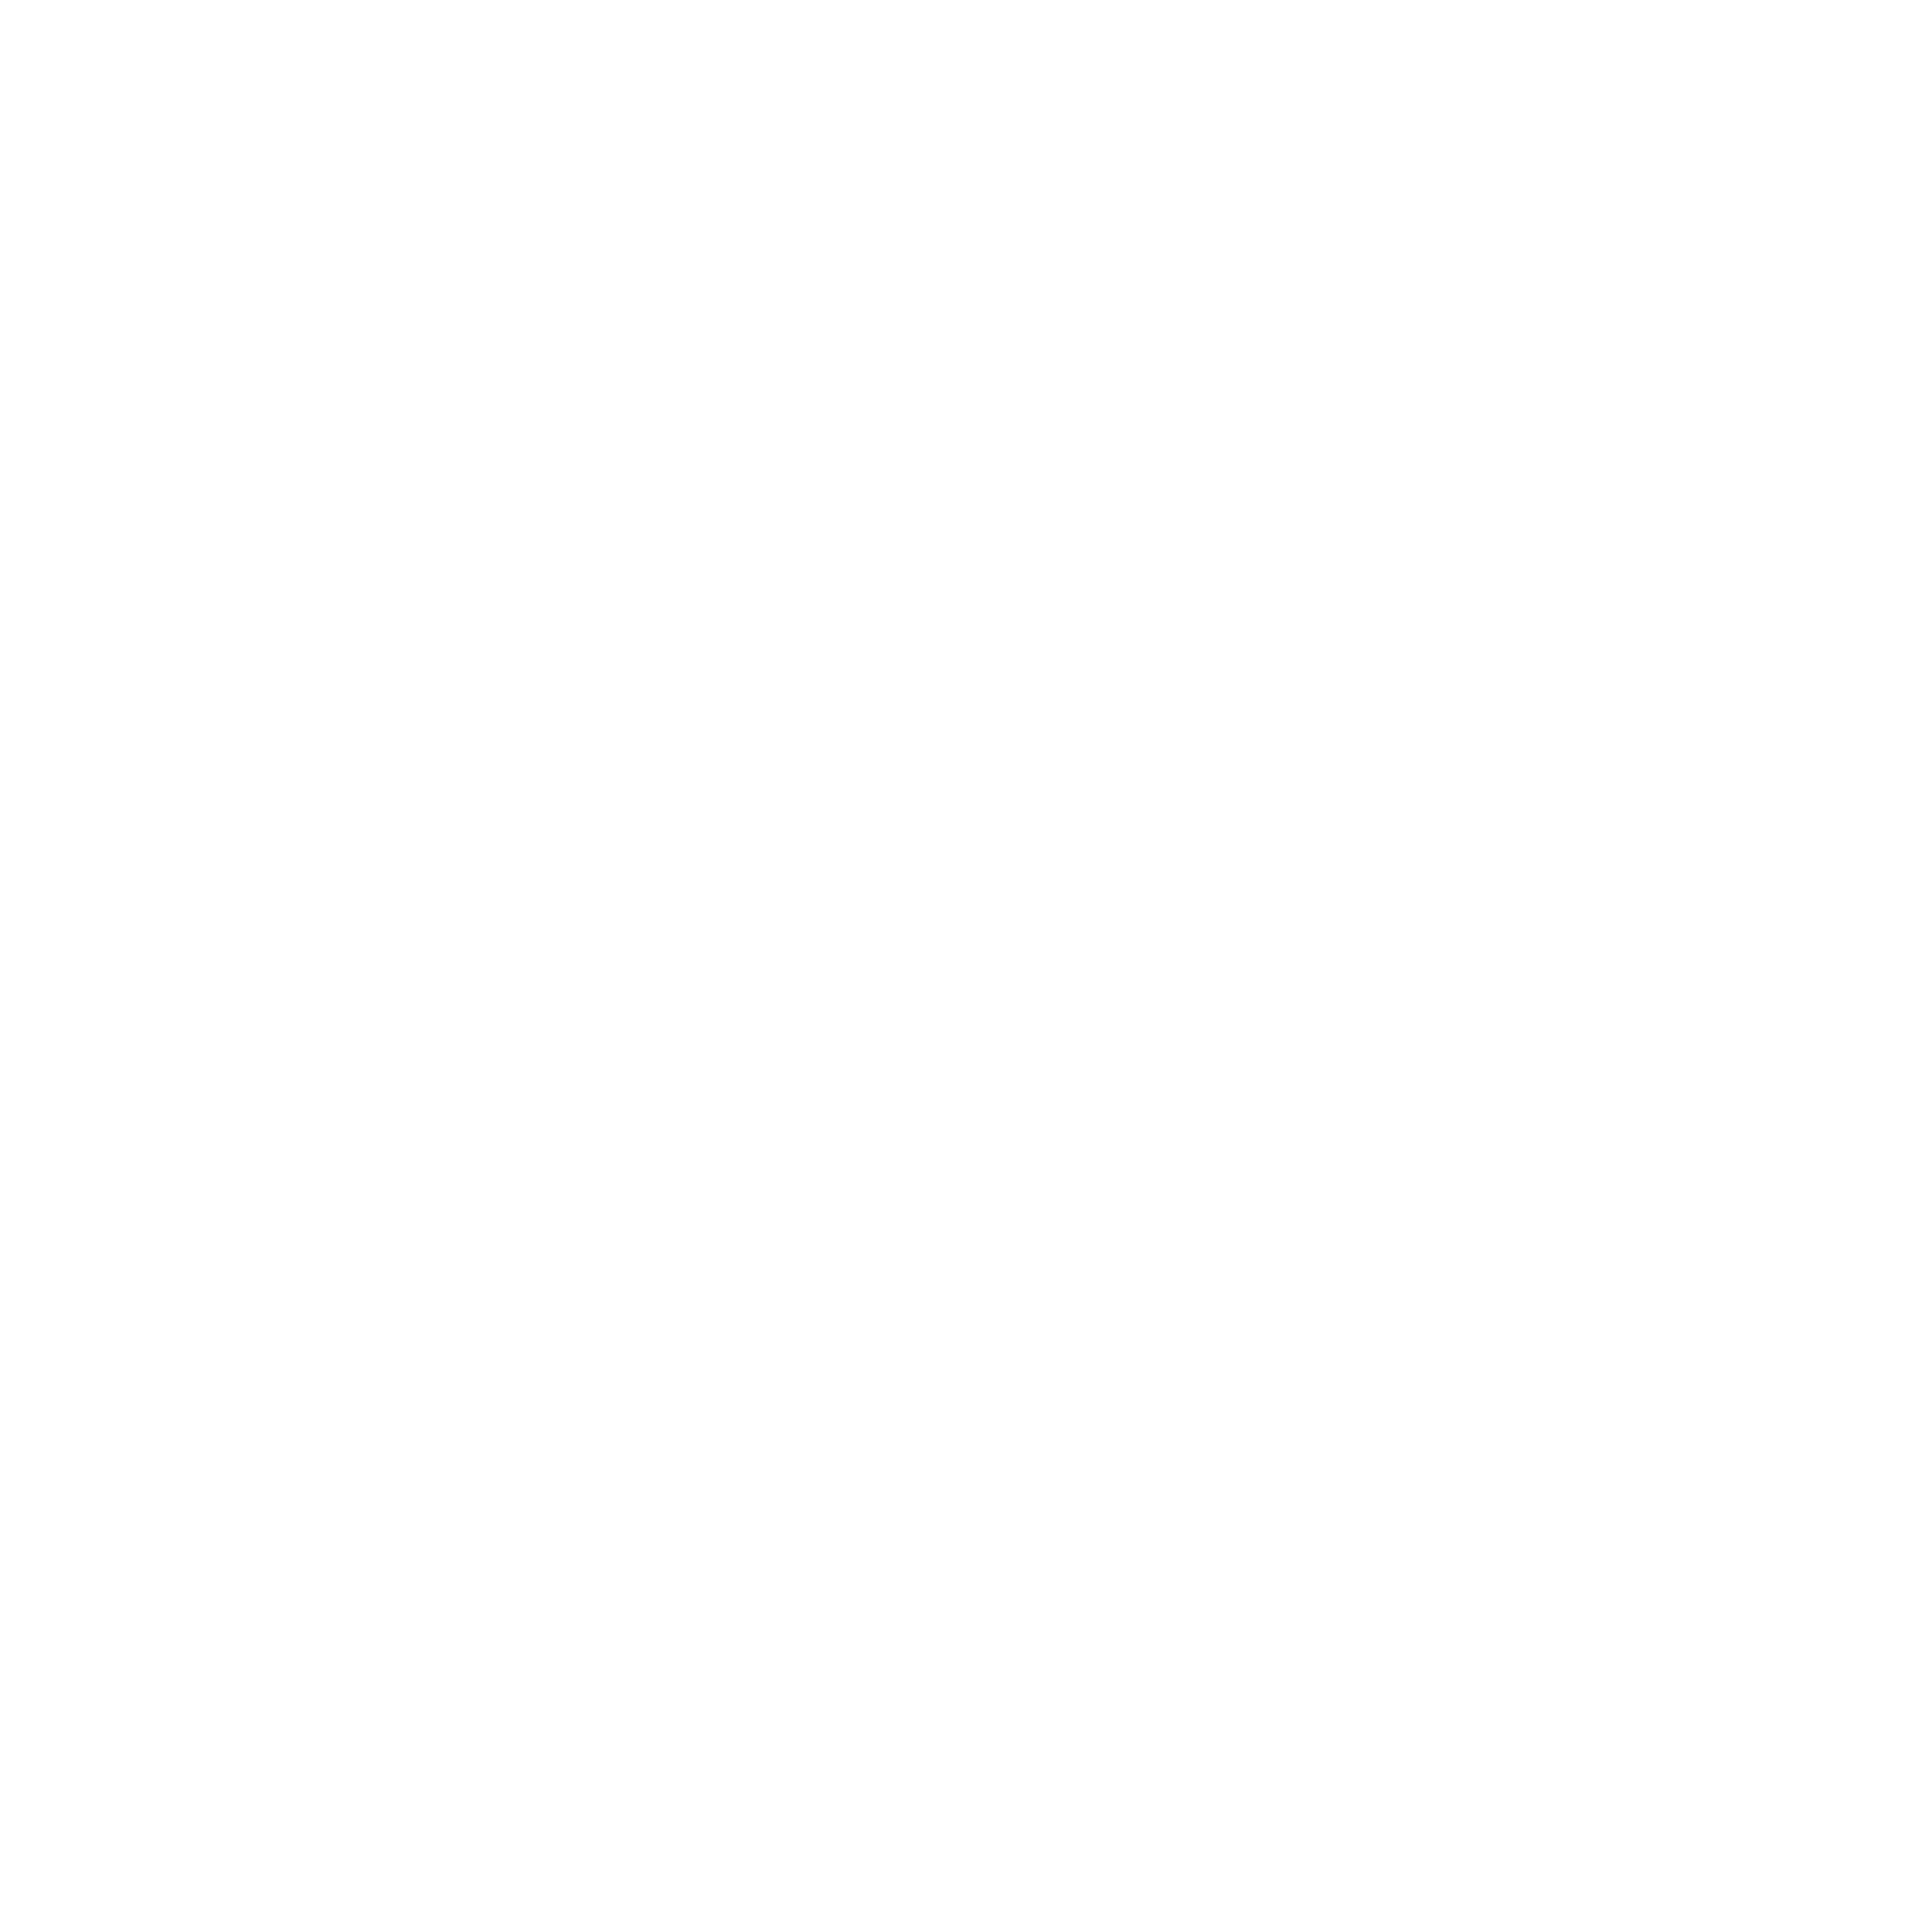

AttributeError: module 'Utility' has no attribute 'histogram_equalization'

In [45]:
print(os.listdir("../Mask_RCNN/Cells/"))
%matplotlib inline

import numpy as np
import cv2
from matplotlib import pyplot as plt

filenames = os.listdir("../Mask_RCNN/Cells/")
ROOT_DIR = os.path.abspath("../")
IMAGE_DIR = os.path.join(ROOT_DIR, "Mask_RCNN\\Cells")
# get filename and sigma value from command line
filename = IMAGE_DIR + "\\--W00001--P00004--Z00000--T00000--eGFP.tif"


import Utility as util

preImg = cv2.imread(IMAGE_DIR + "\\" +filenames[0])
preImg = cv2.resize(preImg, (420, 420))

image = Image.open(IMAGE_DIR + "\\" +filenames[0]).convert('RGB')
image_size = image.size
print(image_size)
display(image)

util.g#util.gabor(image, 1)

for i in filenames:
    img = cv2.imread(IMAGE_DIR + "\\" +i)

    out =  util.(img)
    out =  cv2.resize(out, (420, 420))
    #cv2.imshow(i, out)
    imgplot = plt.imshow(out)
    plt.show()
    #numpy_vertical_concat = np.concatenate((preImg, out), axis=1)
    #preImg = numpy_vertical_concat
    #print(IMAGE_DIR + "\\" +i)

#imgplot = plt.imshow(numpy_vertical_concat)
#plt.show()

#cv2.imshow("cellshist", numpy_vertical_concat)
#cv2.waitKey(0)

#closing all open windows
#cv2.destroyAllWindows()


In [ ]:
img = cv2.imread(filename)#skimage.io.imread(fname=filename, as_gray=True)
#cv2.imshow("cells", img)
#cv2.waitKey(0)

#closing all open windows
#cv2.destroyAllWindows()

#img = cv2.imread('Chatth_Puja_Bihar_India.jpeg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()


out =  util.histogram_equalization(img)


hist,bins = np.histogram(out.flatten(),256,[0,256])
plt.hist(out.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()

filename = IMAGE_DIR + "\\--W00001--P00004--Z00000--T00000--Trans.tif"
transImg = cv2.imread(filename)#
transImg =  cv2.resize(transImg, (420, 420))
#cv2.imshow("trans", transImg)

img =  cv2.resize(img, (420, 420))
#cv2.imshow("cells", img)

out = cv2.resize(out, (420, 420))

numpy_vertical_concat = np.concatenate((transImg, img), axis=1)
numpy_vertical_concat = np.concatenate((numpy_vertical_concat, out), axis=1)

cv2.imshow("cellshist", numpy_vertical_concat)
cv2.waitKey(0)

#closing all open windows
cv2.destroyAllWindows()
